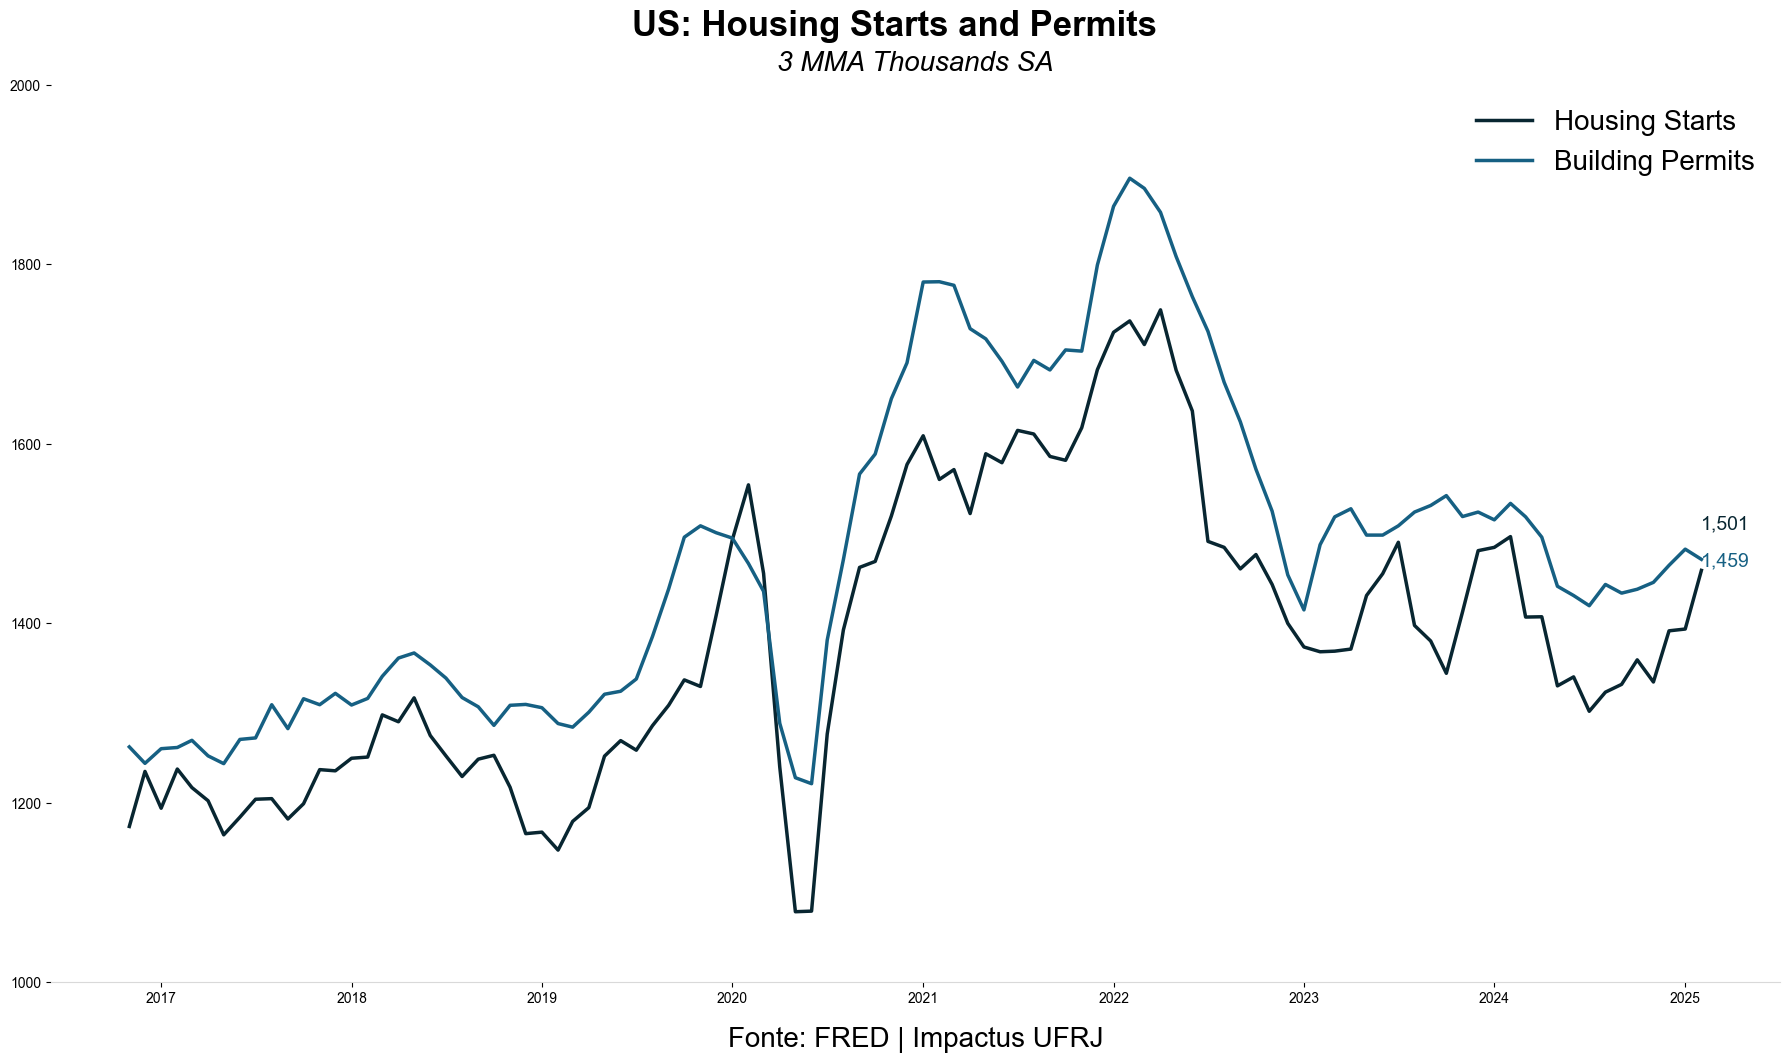

In [11]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.ticker as mtick

fred = Fred(api_key="672d5598c8a41df9397cc5eb92c02d5e")

houst = fred.get_series("HOUST")
housing = pd.DataFrame()
housing["Housing Starts"] = pd.DataFrame(houst)
housing["Housing Starts 3 MMA"] = housing["Housing Starts"].rolling(window=3).mean()

permit = fred.get_series("PERMIT")
housing["Building Permits"] = pd.DataFrame(permit)
housing["Building Permits 3 MMA"] = housing["Building Permits"].rolling(window=3).mean()
housing = housing.tail(100)

plt.rcParams['font.family'] = 'Arial'

fig, ax = plt.subplots(figsize=(18, 10.8))

indc = housing.index

ax.plot(indc, housing["Housing Starts 3 MMA"], linewidth=2.5, color="#082631", label="Housing Starts")
ax.plot(indc, housing["Building Permits 3 MMA"], linewidth=2.5, color="#166083", label="Building Permits")

for column, color in zip(["Housing Starts", "Building Permits"], ["#082631", "#166083"]):
    ax.text(indc[-1], housing[column].iloc[-1], f"{housing[column].iloc[-1]:,.0f}",
            fontsize=14, color=color, verticalalignment='bottom', horizontalalignment='left')

ax.axhline(0, color='black', linewidth=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#d9d9d9')
ax.xaxis.grid(False)

ax.set_ylim(1000, 2000)
ax.set_title("3 MMA Thousands SA", fontsize=20, style='italic', pad=10)
fig.suptitle("US: Housing Starts and Permits", fontweight="bold", fontsize=25)
ax.set_xlabel("Fonte: FRED | Impactus UFRJ", fontsize=20, labelpad=15)
ax.legend(frameon=False, loc='upper right', fontsize= 20)

plt.tight_layout()
plt.show()



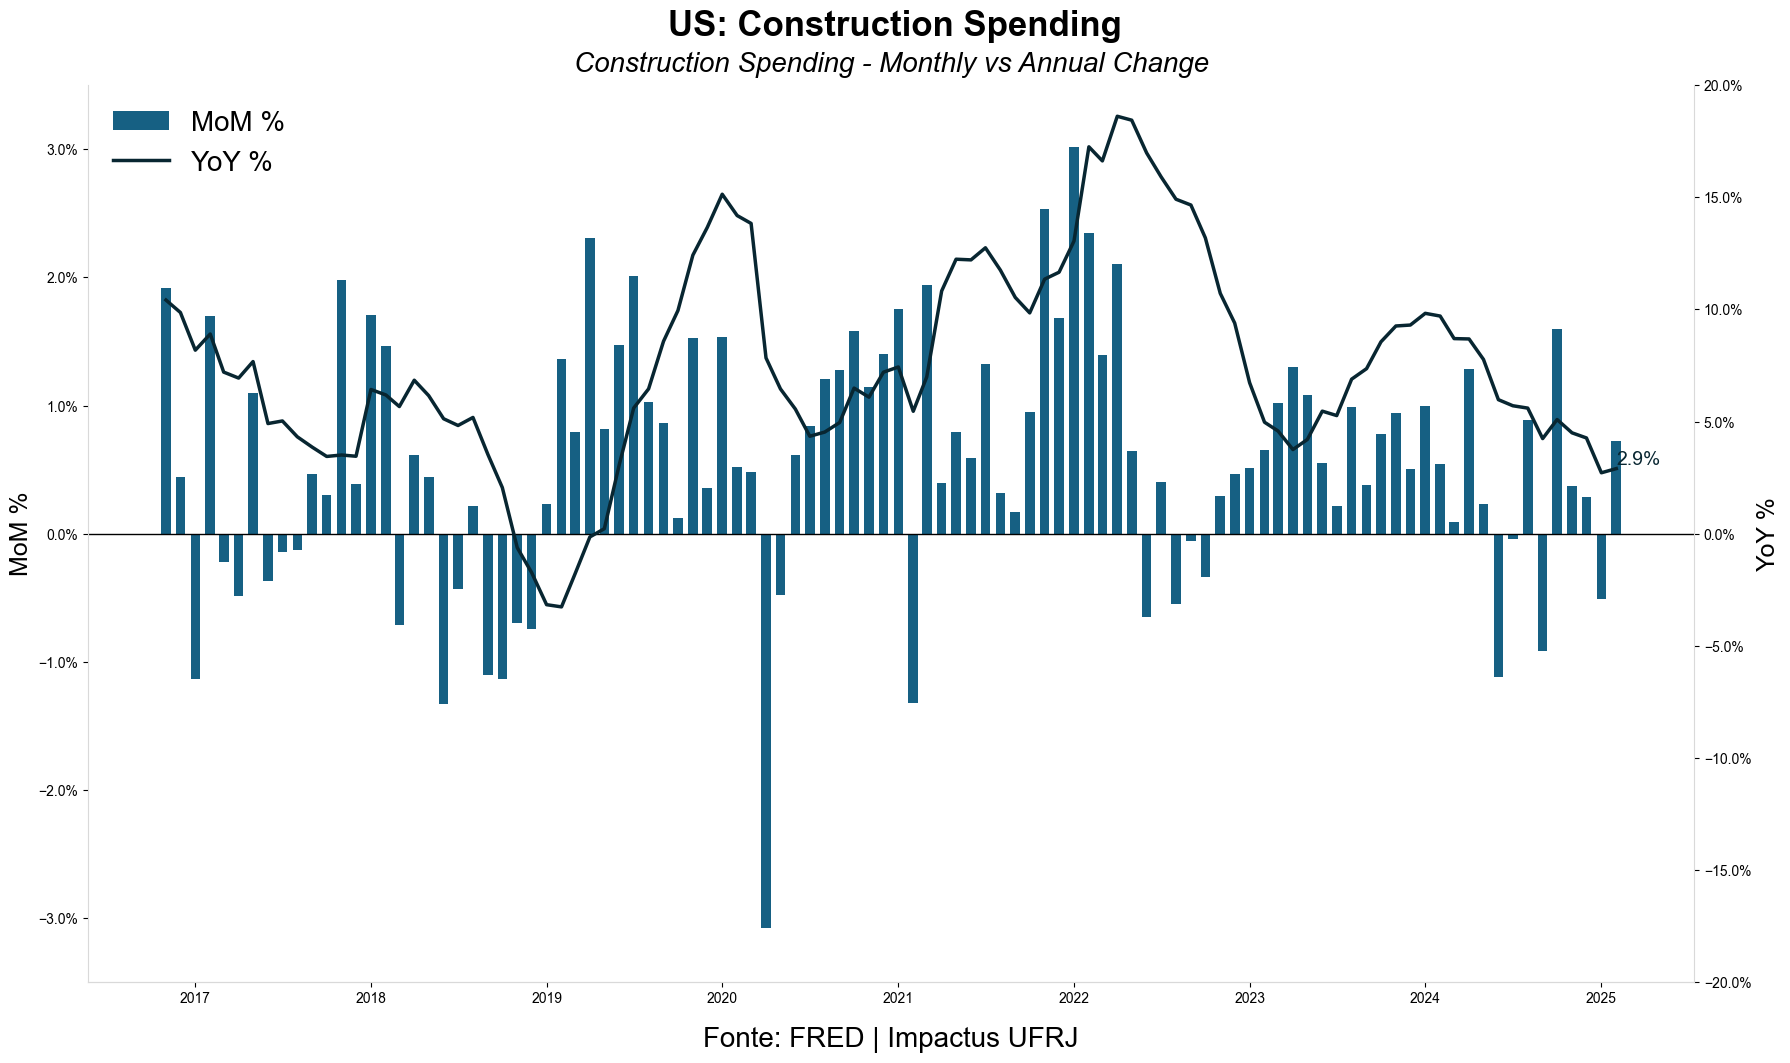

In [13]:

cs = fred.get_series("TTLCONS")
construction_spending = pd.DataFrame()
construction_spending["Construction Spending"] = pd.DataFrame(cs)
construction_spending["MoM %"] = construction_spending["Construction Spending"].pct_change()
construction_spending["YoY %"] = construction_spending["Construction Spending"].pct_change(periods=12)
construction_spending = construction_spending.tail(100)

fig, ax1 = plt.subplots(figsize=(18, 10.8))

indc = construction_spending.index

ax1.bar(indc, construction_spending["MoM %"], color="#166083", label="MoM %", width=20)
ax1.axhline(0, color='black', linewidth=1)
ax1.set_ylim(-0.035, 0.035)
ax1.yaxis.set_major_formatter(PercentFormatter(1.0))
ax1.set_ylabel("MoM %", fontsize=18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#d9d9d9')
ax1.xaxis.grid(False)

ax2 = ax1.twinx()
ax2.plot(indc, construction_spending["YoY %"], color="#082631", linewidth=2.5, label="YoY %")
ax2.set_ylim(-0.2, 0.2)
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))
ax2.set_ylabel("YoY %", fontsize=18)
ax2.text(indc[-1], construction_spending["YoY %"].iloc[-1],
         f"{construction_spending['YoY %'].iloc[-1]:.1%}",
         fontsize=14, color="#082631",
         verticalalignment='bottom', horizontalalignment='left')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_color('#d9d9d9')
ax2.spines['left'].set_color("#d9d9d9")
ax2.spines['bottom'].set_color('#d9d9d9')
ax2.xaxis.grid(False)

ax1.set_title("Construction Spending - Monthly vs Annual Change", fontsize=20, style='italic', pad=10)
fig.suptitle("US: Construction Spending", fontweight="bold", fontsize=25)
ax1.set_xlabel("Fonte: FRED | Impactus UFRJ", fontsize=20, labelpad=15)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='upper left', fontsize=20)

plt.tight_layout()
plt.show()

